<a href="https://colab.research.google.com/gist/annrachman29/52aa6de0f0724d064ccc2a69eddf3342/1a_tugasai_annisa-rachman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

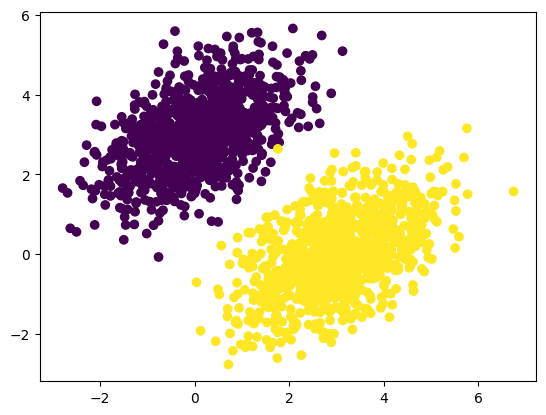

Loss at step 0: 3.9634
Loss at step 1: 0.6149
Loss at step 2: 0.2014
Loss at step 3: 0.1340
Loss at step 4: 0.1175
Loss at step 5: 0.1089
Loss at step 6: 0.1020
Loss at step 7: 0.0957
Loss at step 8: 0.0900
Loss at step 9: 0.0847
Loss at step 10: 0.0799
Loss at step 11: 0.0754
Loss at step 12: 0.0713
Loss at step 13: 0.0676
Loss at step 14: 0.0641
Loss at step 15: 0.0609
Loss at step 16: 0.0580
Loss at step 17: 0.0553
Loss at step 18: 0.0528
Loss at step 19: 0.0505
Loss at step 20: 0.0484
Loss at step 21: 0.0464
Loss at step 22: 0.0446
Loss at step 23: 0.0430
Loss at step 24: 0.0415
Loss at step 25: 0.0401
Loss at step 26: 0.0388
Loss at step 27: 0.0376
Loss at step 28: 0.0365
Loss at step 29: 0.0355
Loss at step 30: 0.0346
Loss at step 31: 0.0338
Loss at step 32: 0.0330
Loss at step 33: 0.0323
Loss at step 34: 0.0316
Loss at step 35: 0.0310
Loss at step 36: 0.0304
Loss at step 37: 0.0299
Loss at step 38: 0.0295
Loss at step 39: 0.0290


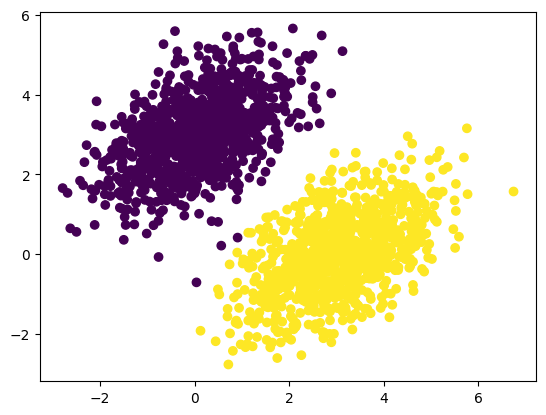

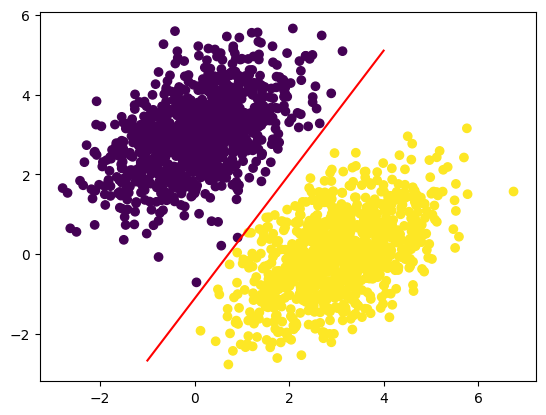

In [ ]:
## ANNISA RACHMAN - 2006569963
## NO 1a
import tensorflow as tf
import numpy as np

## Generating Two Classes
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
  mean=[0, 3],
  cov=[[1, 0.5],[0.5, 1]],
  size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
  mean=[3, 0],
  cov=[[1, 0.5],[0.5, 1]],
  size=num_samples_per_class)

inputs = np.vstack((
  negative_samples,
  positive_samples)).astype(np.float32)


## Generating Targets
targets = np.vstack((
  np.zeros((
    num_samples_per_class, 1),
    dtype="float32"),
  np.ones(
    (num_samples_per_class, 1),
    dtype="float32")))


## Plot The Data
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()


## Linear Classifier
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(
    shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(
    shape=(output_dim,)))


## The Forward Pass Function
def model(inputs):
    return tf.matmul(inputs, W) + b


## The Loss Function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)


## The Training Step
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss


## The Batch Training Loop
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")


## The Training Result
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()


## Creating Visualized Model
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]

plt.plot(x, y, "-r")
plt.scatter(
    inputs[:, 0],
    inputs[:, 1],
    c=predictions[:, 0] > 0.5)